### Students:
 Nicolas Charpentier

 Lydia Delgado Uriarte


#         BrakTooth Attack Dataset


The ISOT BrakTooth Attack dataset contains Bluetooth classic traffic from both normal Bluetooth communications and BrakTooth-based attacks.
In this notebook, we are training our data with different models to detect if there is an attack or not. 





## Import libraries and load data
Import **pandas** library to work with datasets, **numpy** library that support matrix operation, **matplotlib** library for plotting data.  

In [ ]:
# Some libraries to install
!! pip install scikit-learn
!! pip install imbalanced-learn
!! pip install memory-profiler
!! pip install sns

['Requirement already satisfied: sns in /Users/lydiadelgado/anaconda3/lib/python3.11/site-packages (0.1)']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#pd.set_option('display.max_rows', None)

# Read the csv
We will use pandas to read a csv and make the csv a DataFrame.

In [ ]:
# We read the csv in 
X_test = pd.read_csv("X_test.csv")
dataset = pd.read_csv("X_train.csv")

In [ ]:
# 
dataset.all()

Protocol     True
Info         True
Length       True
Delta       False
Type         True
dtype: bool

In [ ]:
count_false = (dataset['Delta'] == False).sum()
print(f'False values in column Delta: {count_false}')
dataset["Info"].unique()

False values in column Delta: 4


array(['Rcvd Link Key Request', 'Sent Link Key Request Negative Reply',
       'Rcvd Command Complete (Link Key Request Negative Reply)',
       'LM Sent', 'LMP_au_rand', 'FHS', 'LMP_not_accepted', 'LM Received',
       'Rcvd Connect Request', 'Sent Accept Connection Request',
       'Rcvd Command Status (Accept Connection Request)',
       'Rcvd Connect Complete', 'Sent Read Clock offset',
       'Sent Information Request (Extended Features Mask)',
       'Rcvd Max Slots Change',
       'Rcvd Connection Request (SDP, SCID: 0x0041)',
       'Rcvd Command Status (Read Clock offset)',
       'Sent Read Remote Version Information',
       'Sent Connection Response - Pending (SCID: 0x0041)',
       'Rcvd Read Clock Offset Complete',
       'Rcvd Command Status (Read Remote Version Information)',
       'Sent Read Remote Supported Features',
       'Rcvd Read Remote Version Information Complete',
       'Rcvd Command Status (Read Remote Supported Features)',
       'Sent Remote Name Request

In [ ]:
mask = (dataset['Delta'] == False)

# Imprime los valores False
print(dataset.loc[mask, 'Delta'])

1661    0.0
1896    0.0
2116    0.0
2249    0.0
Name: Delta, dtype: float64


In [ ]:
# Check if we have duplicated values or null values
print(f"Null values:\n{dataset.isna().sum()}\n")
print(f"Duplicated values: {dataset.duplicated().sum()}")

Null values:
Protocol    0
Info        0
Length      0
Delta       0
Type        0
dtype: int64

Duplicated values: 0


In [ ]:
# Check the types we have for the protocols
print(dataset["Type"].unique())
print(dataset["Protocol"].unique())

['au_rand_flooding' 'duplicated_encapsulated_payload' 'duplicated_iocap'
 'truncated_sco_link_request' 'feature_response_flooding'
 'invalid_feature_page_execution' 'lmp_auto_rate_overflow'
 'lmp_overflow_dm1' 'truncated_lmp_accepted' 'invalid_setup_complete'
 'invalid_timing_accuracy' 'normal']
['HCI_EVT' 'HCI_CMD' 'HCI H4 Broadcom' 'LMP' 'Baseband' 'L2CAP' 'SDP'
 'BNEP' 'RFCOMM' 'OBEX']


In [ ]:
dataset["Protocol"].describe()

count     6402
unique      10
top       OBEX
freq      2575
Name: Protocol, dtype: object

# Check the count of the Protocols
To see how the number of total protocols are distributed, we incorporate a bar graph and as well a table from ascendent to descendent in order to visualize which protocol attack .


In [ ]:
# Count the occurrences of each protocol
#dataset = dataset.shape()
protocol_counts = dataset['Protocol'].value_counts()
protocol_counts

OBEX               2575
LMP                1546
HCI_EVT             964
RFCOMM              638
HCI_CMD             287
L2CAP               231
Baseband             78
SDP                  44
HCI H4 Broadcom      37
BNEP                  2
Name: Protocol, dtype: int64

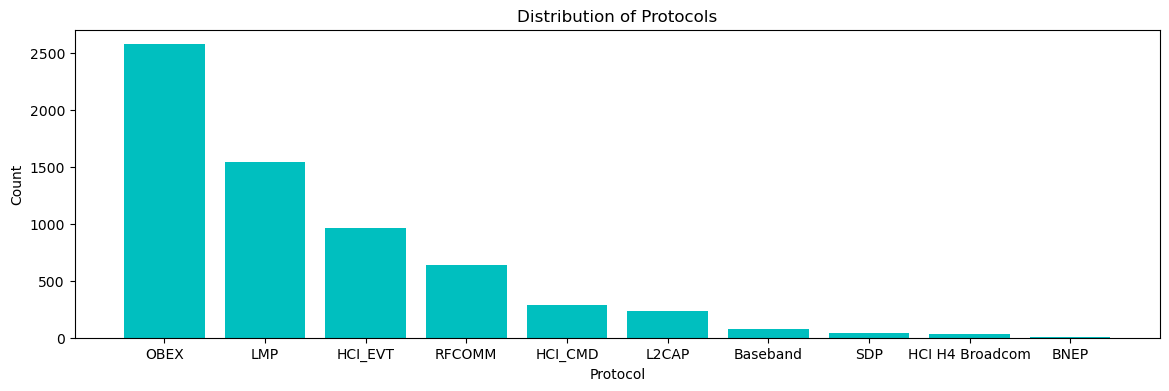

In [ ]:
# Create a bar plot using Matplotlib
plt.figure(figsize=(14, 4))
plt.bar(protocol_counts.index, protocol_counts.values, color='c')
plt.title('Distribution of Protocols')
plt.grid(False)
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.show()

In [ ]:
type_counts = dataset['Type'].value_counts()
type_counts

normal                             4055
au_rand_flooding                    526
truncated_sco_link_request          304
duplicated_iocap                    277
invalid_feature_page_execution      239
truncated_lmp_accepted              236
invalid_timing_accuracy             188
feature_response_flooding           161
lmp_overflow_dm1                    142
lmp_auto_rate_overflow              124
duplicated_encapsulated_payload      94
invalid_setup_complete               56
Name: Type, dtype: int64

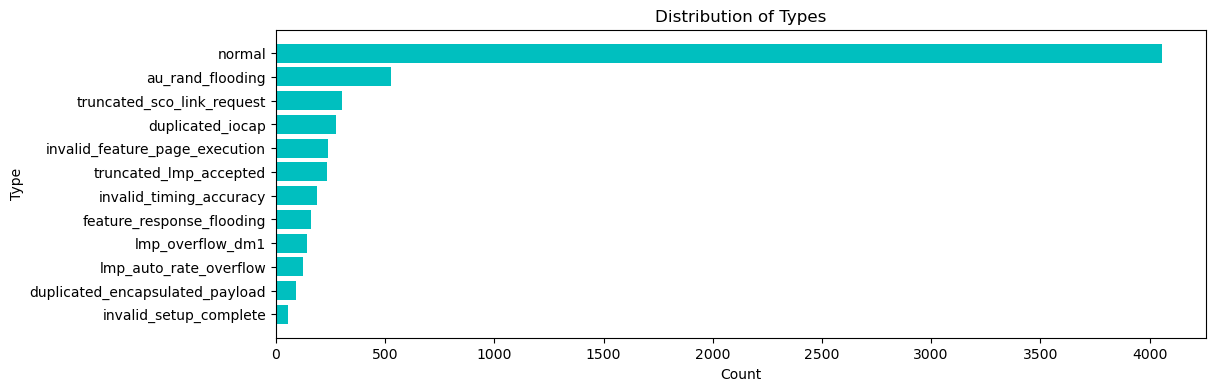

In [ ]:
# Create a bar plot using Matplotlib
plt.figure(figsize=(12, 4))
plt.barh(type_counts.index, type_counts.values, color='c')
plt.title('Distribution of Types')
plt.gca().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Type')
plt.show()

In [ ]:
# Rename the columns if its not normal, then it will be attack
dataset["Type"] = dataset["Type"].str.replace("normal", "No Attack")
# Numpy where to check where values are different from no attack
dataset["Type"] = np.where(dataset["Type"]!= "No Attack", "Attack", dataset["Type"])


In [ ]:
type_counts = dataset['Type'].value_counts()
type_counts

No Attack    4055
Attack       2347
Name: Type, dtype: int64

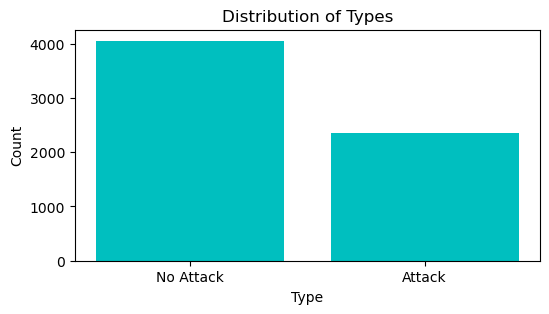

In [ ]:
# Create a bar plot using Matplotlib
plt.figure(figsize=(6, 3))
plt.bar(type_counts.index, type_counts.values, color='c')
plt.title('Distribution of Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

## Clean our information
Seeing the info column, we can see that the dataset have repeated values as well after the "()" characters or "-" character. In this case, we would implement a method to delete the rest of the string if it detects one of this special characters.

In [ ]:
dataset["Info"].unique()

array(['Rcvd Link Key Request', 'Sent Link Key Request Negative Reply',
       'Rcvd Command Complete (Link Key Request Negative Reply)',
       'LM Sent', 'LMP_au_rand', 'FHS', 'LMP_not_accepted', 'LM Received',
       'Rcvd Connect Request', 'Sent Accept Connection Request',
       'Rcvd Command Status (Accept Connection Request)',
       'Rcvd Connect Complete', 'Sent Read Clock offset',
       'Sent Information Request (Extended Features Mask)',
       'Rcvd Max Slots Change',
       'Rcvd Connection Request (SDP, SCID: 0x0041)',
       'Rcvd Command Status (Read Clock offset)',
       'Sent Read Remote Version Information',
       'Sent Connection Response - Pending (SCID: 0x0041)',
       'Rcvd Read Clock Offset Complete',
       'Rcvd Command Status (Read Remote Version Information)',
       'Sent Read Remote Supported Features',
       'Rcvd Read Remote Version Information Complete',
       'Rcvd Command Status (Read Remote Supported Features)',
       'Sent Remote Name Request

In [ ]:
dataset

,Protocol,Info,Length,Delta,Type
0,HCI_EVT,Rcvd Link Key Request,9,0.010473,Attack
1,HCI_CMD,Sent Link Key Request Negative Reply,10,0.010473,Attack
2,HCI_EVT,Rcvd Link Key Request,9,0.017913,Attack
3,HCI_EVT,Rcvd Command Complete (Link Key Request Negati...,13,0.002642,Attack
4,HCI_CMD,Sent Link Key Request Negative Reply,10,0.002882,Attack
...,...,...,...,...,...
6397,RFCOMM,Sent UIH Channel=12 UID,14,0.006531,No Attack
6398,HCI_EVT,Rcvd Number of Completed Packets,8,0.004969,No Attack
6399,OBEX,Sent Continue,21,0.014489,No Attack
6400,LMP,LMP_power_control_req,64,0.003510,No Attack


In [ ]:
X_test = pd.read_csv("X_test.csv")
X_test['Info'].unique()

array(['FHS', 'LM Received', 'LM Sent', 'LMP_accepted',
       'LMP_accepted_ext', 'LMP_au_rand', 'LMP_auto_rate',
       'LMP_channel_classification', 'LMP_channel_classification_req',
       'LMP_detach', 'LMP_features_req', 'LMP_features_req_ext',
       'LMP_features_res', 'LMP_features_res_ext',
       'LMP_host_connection_req', 'LMP_max_slot', 'LMP_max_slot_req',
       'LMP_not_accepted', 'LMP_not_accepted_ext',
       'LMP_packet_type_table_req', 'LMP_power_control_req',
       'LMP_power_control_res', 'LMP_set_AFH', 'LMP_setup_complete',
       'LMP_timing_accuracy_req', 'LMP_timing_accuracy_res',
       'LMP_version_req', 'LMP_version_res',
       'Rcvd Command Complete (Link Key Request Negative Reply)',
       'Rcvd Command Complete (Write Link Policy Settings)',
       'Rcvd Command Complete (Write Scan Enable)',
       'Rcvd Command Status (Accept Connection Request)',
       'Rcvd Command Status (Change Connection Packet Type)',
       'Rcvd Command Status (Read Clock of

In [ ]:
dataset = dataset[dataset['Info'].isin(X_test['Info'].unique())]

dataset = dataset.reset_index(drop=True)
dataset

,Protocol,Info,Length,Delta,Type
0,HCI_EVT,Rcvd Link Key Request,9,0.010473,Attack
1,HCI_CMD,Sent Link Key Request Negative Reply,10,0.010473,Attack
2,HCI_EVT,Rcvd Link Key Request,9,0.017913,Attack
3,HCI_EVT,Rcvd Command Complete (Link Key Request Negati...,13,0.002642,Attack
4,HCI_CMD,Sent Link Key Request Negative Reply,10,0.002882,Attack
...,...,...,...,...,...
5906,RFCOMM,Sent UIH Channel=12 UID,14,0.006531,No Attack
5907,HCI_EVT,Rcvd Number of Completed Packets,8,0.004969,No Attack
5908,OBEX,Sent Continue,21,0.014489,No Attack
5909,LMP,LMP_power_control_req,64,0.003510,No Attack


In [ ]:
dataset.count()

Protocol    5911
Info        5911
Length      5911
Delta       5911
Type        5911
dtype: int64

In [ ]:
dataset

,Protocol,Info,Length,Delta,Type
0,HCI_EVT,Rcvd Link Key Request,9,0.010473,Attack
1,HCI_CMD,Sent Link Key Request Negative Reply,10,0.010473,Attack
2,HCI_EVT,Rcvd Link Key Request,9,0.017913,Attack
3,HCI_EVT,Rcvd Command Complete (Link Key Request Negati...,13,0.002642,Attack
4,HCI_CMD,Sent Link Key Request Negative Reply,10,0.002882,Attack
...,...,...,...,...,...
5906,RFCOMM,Sent UIH Channel=12 UID,14,0.006531,No Attack
5907,HCI_EVT,Rcvd Number of Completed Packets,8,0.004969,No Attack
5908,OBEX,Sent Continue,21,0.014489,No Attack
5909,LMP,LMP_power_control_req,64,0.003510,No Attack


## Explanation of the dataset
The dataframe is divided into different columns 
- Protocol: Used in the Bluetooth Packet
- Info: Provides information about each packet and depends on the type of protocol
- Length: It's the length of the packet in bytes
- Delta:Time difference between current packet and previous packet
- Type: It represents normal vs attack conditions, labelled manually. <- dependent variable

In [ ]:
dataset

,Protocol,Info,Length,Delta,Type
0,HCI_EVT,Rcvd Link Key Request,9,0.010473,Attack
1,HCI_CMD,Sent Link Key Request Negative Reply,10,0.010473,Attack
2,HCI_EVT,Rcvd Link Key Request,9,0.017913,Attack
3,HCI_EVT,Rcvd Command Complete (Link Key Request Negati...,13,0.002642,Attack
4,HCI_CMD,Sent Link Key Request Negative Reply,10,0.002882,Attack
...,...,...,...,...,...
5906,RFCOMM,Sent UIH Channel=12 UID,14,0.006531,No Attack
5907,HCI_EVT,Rcvd Number of Completed Packets,8,0.004969,No Attack
5908,OBEX,Sent Continue,21,0.014489,No Attack
5909,LMP,LMP_power_control_req,64,0.003510,No Attack


## We will shape our data 

In [ ]:
dataset

X = dataset['Length'].shape
y = dataset['Type'].shape
X


(5911,)

## Transform the string values into numerical values so we can work with them in the X dataset.
We will be using the library OneHotEncoder and we will add our values we want to transform in an array as strings, denoting the values taken on by categorical (discrete) features. 

In [ ]:
from sklearn.preprocessing import OneHotEncoder

### Transform protocol data 
We will transform the string into numerical values
Once done this we will create a protocol dataframe

In [ ]:
# Codificator Instance
onehot_encoder = OneHotEncoder()

# Codify the independent variable 
data_to_encode = dataset[['Protocol']]

# Column to numpy array
data_array = data_to_encode.values

#  reshape a data_array 
reshaped_data = data_array.reshape(-1, 1)

# Initialize decoder one-hot
onehot_encoder = OneHotEncoder()

# Adjust & transform data codifying 'Type'
onehot_encoded_protocol = onehot_encoder.fit_transform(reshaped_data)
categories = onehot_encoder.get_feature_names_out(input_features=['Protocol'])


In [ ]:
# We transform the matrix into an array and save it in a dataframe 
protocoldf = pd.DataFrame(onehot_encoded_protocol.toarray(), columns= categories)


# Transform Info data 
We will transform the string into numerical values
Once done this we will create a info dataframe

In [ ]:
# Codificator Instance
onehot_encoder = OneHotEncoder()

# Codify the independent variable 
data_to_encode = dataset[['Info']]

# Column to numpy array
data_array = data_to_encode.values

#  reshape a data_array 
reshaped_data = data_array.reshape(-1, 1)

# Initialize decoder one-hot
onehot_encoder = OneHotEncoder()

# Adjust & transform data codifying 'Type'
onehot_encoded_info = onehot_encoder.fit_transform(reshaped_data)
categories = onehot_encoder.get_feature_names_out(input_features=['Info'])
print(onehot_encoded_info.toarray().shape)

(5911, 59)


In [ ]:
# We transform the matrix into an array and save it in a dataframe 
infodf = pd.DataFrame(onehot_encoded_info.toarray(), columns= categories)


# Assign our dependent variable
We will use the column Type from the dataset since is the way we're classifying our data

In [ ]:
#Assign our variable y 
y = dataset["Type"]


In [ ]:
y.head()
dataset["Info"]

0                                   Rcvd Link Key Request
1                    Sent Link Key Request Negative Reply
2                                   Rcvd Link Key Request
3       Rcvd Command Complete (Link Key Request Negati...
4                    Sent Link Key Request Negative Reply
                              ...                        
5906                             Sent UIH Channel=12 UID 
5907                     Rcvd Number of Completed Packets
5908                                        Sent Continue
5909                                LMP_power_control_req
5910                                LMP_power_control_res
Name: Info, Length: 5911, dtype: object

# Standardize values
Using the librarie Standard Scaler, we standardize our values Length and Delta since are the ones we have numerical since the beginning, we do this since standardization makes it easier to compare data points that have different units being **Length** bytes and **Delta** time units. 

By scaling the values to have a mean of 0 and a standard deviation of 1, we can compare the relative position of data points within their respective distributions.

Standardize features by removing the mean and scaling to unit variance.
The standard score of a sample x is calculated as:

$$ z = \frac{(x - u)}{s} $$

In [ ]:
# We import Standard Scaler
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
dataset['Length'] = scaler.fit_transform(np.array(dataset['Length']).reshape(-1, 1))
dataset['Delta'] = scaler.fit_transform(np.array(dataset['Delta']).reshape(-1, 1))
dataset.head(10)
dataset

## Append Dataframes

Now we're going to create a new dataframe with our new values standardized and transformed into numerical values. 

We will create two datasets to tests our model and see if there are changes in the number of features used.

### First dataset with all the features

In [ ]:
# in this step we put our independents variables together and the dependent separate

# Boolean variable to check if the dataset is created
created = False

# Go through the function once 
if not created:
    # Create the first dataframe with the values
    new_dataset = pd.concat([protocoldf, infodf, dataset["Length"], dataset["Delta"]], axis=1)

    # Mark variable as true so it doesn't repeat if it is needed to rerun the whole program.
    created = True

In [ ]:
X = new_dataset
X

### Second dataset with features Delta and Length
We choose this values since are the ones numerical since the beginning and we will see if by not using the other features would affect or improve the accuracy of our model.

In [ ]:
# in this step we put our independents variables together and the dependent separate

# Boolean variable to check if the dataset is created
second_created = False

# Go through the function once 
if not second_created:
    # Create the first dataframe with the values
    TwoX = pd.concat([dataset["Length"], dataset["Delta"]], axis=1)
    
    # Mark variable as true so it doesn't repeat if it is needed to rerun the whole program.
    second_created = True
    
    
TwoX.head()
TwoX

# Try the models

# Model assessment: Training set and testing set

## Split the data
First we split the data into training set and test set. We will train our model using the training set and to test it is the test set. We will implement a 

The library we're going to use train_test_split split arrays or matrices into random train and test subsets.

In [ ]:
# Import our library to split our data into two sets
from sklearn.model_selection import train_test_split

In [ ]:
seed = 42
# Dataset with all features. We choose test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Dataset with features Delta and Length, we choose this values since they
# are numerical without using any encoder
X_train2, X_test2, y_train2, y_test2 = train_test_split(TwoX, y, test_size=0.2, random_state=seed)


# Model Selection 

To know which model is more convenient for our problem, we would train some models and compare how well they fit each model, taking into consideration:
- Accuracy
- Compare the accuracy between test set and train set
- Computation times, memory used
- Simplest method for a better score 

Also, knowing that we are facing a classification problem we will try to find the more appropiate models for this, in this case is binary classification since it is divided only in two categories being **No Attack** and **Attack**.


### Confusion Matrix
This is a matrix that counts the classification classes. In this case we would count the Attacks and No Attacks **true positive** and also the **falses**.

$$
\begin{matrix}
        &          & & Predicted &  \\
        &          &  Negative   &  & Positive \\
        & Negative &     True Negative TN  &  & False Positive FP\\
Actual  &          & & & \\
        &  Positive  &   False Negative FN  & & True Positive TP
\end{matrix} 
$$

### Precision of the classifier
This returns the accuracy of the positives prediction made by the classifier.

The formula for this method:

$$precision = \frac{ TP  }{ TP + FP }$$

- TP true positives being the number of correctly predicted positive instances
- FP false positives being the number of negative instances incorrectly classified as positive.

### Recall
Known as sensitive or true positive rate (TPR), the classifier detects the correct positive instances ratio.

The equation for the Recall metric:

$$ F1 = \frac{TP}{TP + FN}$$

Tp is the number of True Positives and FN is the numver for False Negatives.

### F1 Score
This metric is Precision and Recall combined and is helpful in this problem since its useful to compare two classifiers. This metric would be only a high score if **precision** and **recall** are high.

Formula for recall:
$$ F1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}} = 2  \times \frac{ precision \times recall}
{precision + recall} = \frac{TP}{{TP} + \frac{FN+FP}{2}}
 $$


## Import Performance Measure metrics

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

# For calculate computation time
import time
# For calculate memory usage
import tracemalloc

# Try the models
We will create some lists to save the values for this models and at the end we can have a more clear panoram of which model is more suitable for detecting an attack.

In [ ]:
models_name = list(range(1, 6))
computation_time = list(range(1, 6))
accuracy_model = list(range(1,6))
memory_usage = list(range(1,6))